In [1]:
import ast 
import pandas as pd 
import matplotlib.pyplot as plt 

data = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Documents\Projects\Luke Barousse Projects\Python Course  Data Analysis\data_jobs.csv")
df=data
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)


In [2]:
df=df[df['job_title_short'] == 'Data Analyst']

In [11]:
df_explode = df.explode('job_skills')
skill_stats= df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary =('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count',ascending = False).head(10)



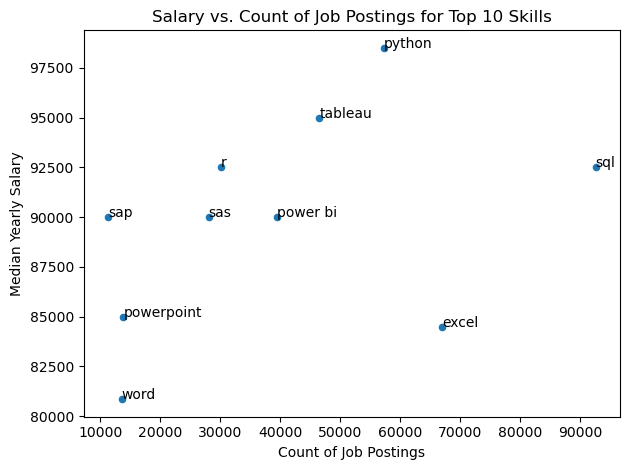

In [16]:
skill_stats.plot(kind = 'scatter', x= 'skill_count', y= 'median_salary' )
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary")
plt.title("Salary vs. Count of Job Postings for Top 10 Skills")
plt.tight_layout()


for i , txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],txt)

plt.show()